**5505 Assignment: 3 - Clustering**

***Name: Shiva chakravarthy Gollapudi***

*Student id: 11468697*

## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## **Read input file**

In [ ]:
df = pd.read_csv(r'/content/ALS_TrainingData_2223.csv')

In [ ]:
df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,...,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,...,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,...,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,...,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.6510,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.42015,2.257975,2.17065,0.000414,107.0,...,146.5,138.0,0.023217,2,2.0,0,0.003396,12,12.0,12,0.000000,-1768,2,313,283.5,268.0,4.6,3.75,3.5,0.001824,101,96.0,74,0.044776,4,4.0,3,0.001698,143.0,140.0,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [ ]:


df.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,0.026035,54.436257,32.993252,23.014800,0.071137,43.127755,29.076923,21.542465,0.049191,30.897301,26.963765,23.164327,0.016868,7.353054,5.558011,4.160875,0.007133,92.030589,81.113360,69.890688,0.047658,147.135403,129.579172,113.429600,0.071178,2.474835,2.345584,2.222855,0.000541,107.152182,...,144.289024,135.461130,0.038242,5.309942,4.049708,2.493477,0.006163,10.743140,9.703329,7.778228,0.006595,-682.995502,1.800720,285.301844,238.781601,208.382005,4.628367,4.189269,3.857323,0.001744,90.642375,76.973234,65.373819,0.053587,3.910031,3.592668,2.791273,0.002513,143.428880,140.145254,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,0.016156,44.829577,15.601925,11.231221,0.110889,35.288701,9.593911,7.395303,0.084100,3.164472,2.198824,2.408519,0.011280,2.319538,1.335236,1.354256,0.005070,8.758227,7.245578,8.443662,0.027282,15.754048,12.160938,11.195037,0.033110,0.180246,0.088418,0.172787,0.000481,2.616967,...,11.602846,14.890612,0.035134,2.244651,2.280781,2.124570,0.004372,1.897501,2.771850,3.740073,0.006128,411.800405,0.419334,70.175312,52.626504,49.321238,1.325412,0.243075,0.263050,0.002898,11.104866,8.437749,7.763446,0.027403,0.298516,0.612385,1.055428,0.002477,2.333157,1.789886,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,0.000000,10.000000,8.000000,1.600000,0.002747,11.000000,9.000000,1.000000,0.000000,20.000000,19.500000,2.500000,0.000000,2.920800,2.190600,0.584160,0.000000,70.000000,56.000000,20.

# **EDA**

In [ ]:
df.isnull().sum() #finding null values

ID                 0
Age_mean           0
Albumin_max        0
Albumin_median     0
Albumin_min        0
                  ..
trunk_range        0
Urine.Ph_max       0
Urine.Ph_median    0
Urine.Ph_min       0
cluster            0
Length: 102, dtype: int64

There are no missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB


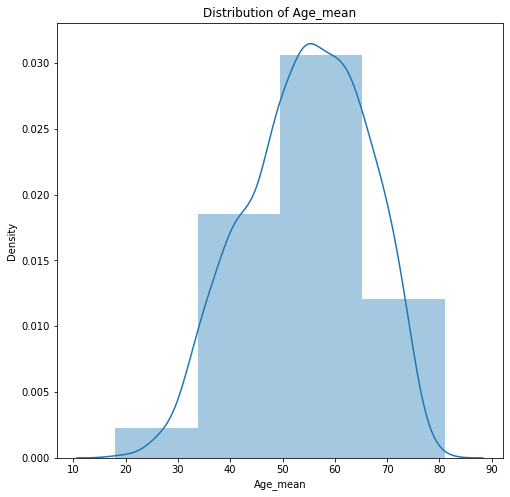

In [ ]:
#Distribution plot for Age_mean
plt.figure(figsize=(8,8))
sns.distplot(df['Age_mean'], bins = 4)
plt.title('Distribution of Age_mean')

plt.show();

From the above figure, we can conclude that the Age_mean is not normally distributed

### **K-Means Clustering¶**


In [ ]:
x = df.iloc[:,:].values

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state=101) # Build a k-means clustering model

In [ ]:
km.fit(x) # Fit the model to data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [ ]:
np.round(km.cluster_centers_) #Finding the centroids 

In [ ]:
df.shape 

(2223, 101)

In [ ]:
km.predict(x) 

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
km.labels_ 

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
print('SSE of the based model: ', km.inertia_)  

SSE of the based model:  20529618202538.504



SSE (sum squared error): SSE means sum of the squared differences between each observation and mean of the cluster that it was assigned. Our SSE of the based model is too high. Increasing the number of clusters will reduce this SSE. 



## **Identify optimum number of clusters**


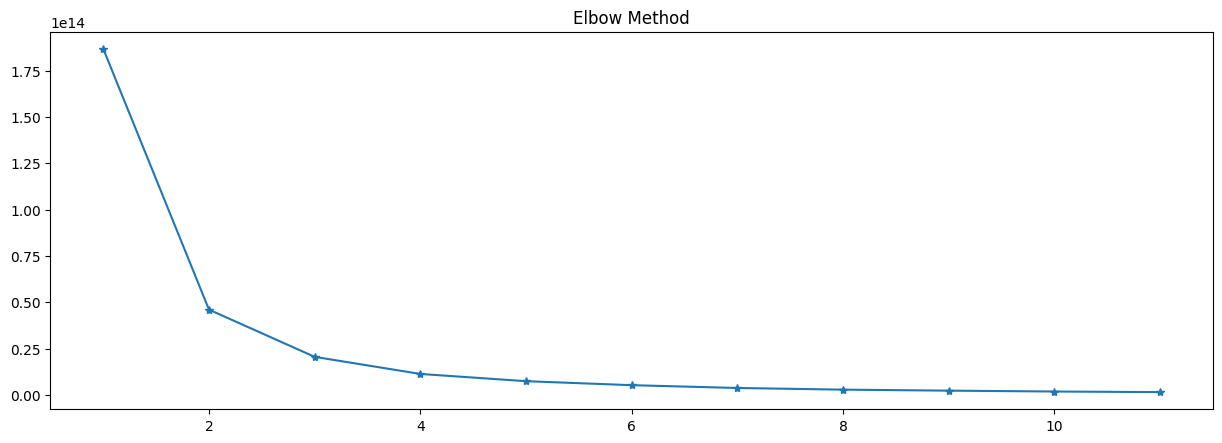

In [ ]:
wss = []

for i in range(1, 12):
    km = KMeans(n_clusters = i, random_state=101)
    km.fit(x)
    wss.append(km.inertia_)
    
plt.figure(figsize=(15,5), dpi = 100)
plt.plot(range(1, 12), wss,marker='*')
plt.title('Elbow Method')

plt.show();

The objective of clustering is to minimise the total intra-cluster variance, or the squared error function.

In general there is no method to determining the exact K value.

One of the metrics that is commonly used to compare the results across different values of K is the mean distance between data points and their cluster centroid.



In [ ]:
wss

[186773153292109.12,
 46007309041462.26,
 20529618202538.504,
 11294848583726.984,
 7386211536693.597,
 5229825146392.691,
 3717449047700.329,
 2818720655623.267,
 2280522015249.2085,
 1812323250582.627,
 1484318993171.567]

From the above diagram, we can conclude that Within sum of square is less for the cluster 4 and the rest all are negligible difference.

In [ ]:
km4 = KMeans(n_clusters = 4, random_state=101)
km4.fit(x)
y = km4.fit_predict(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [ ]:
km4.cluster_centers_

In [ ]:
km4.cluster_centers_[:,0]
km4.cluster_centers_[:,1]

array([ 937.65194346, 2123.37477148,  318.45804196, 1535.89591078])

array([54.41342756, 54.72577697, 54.51573427, 54.55204461])

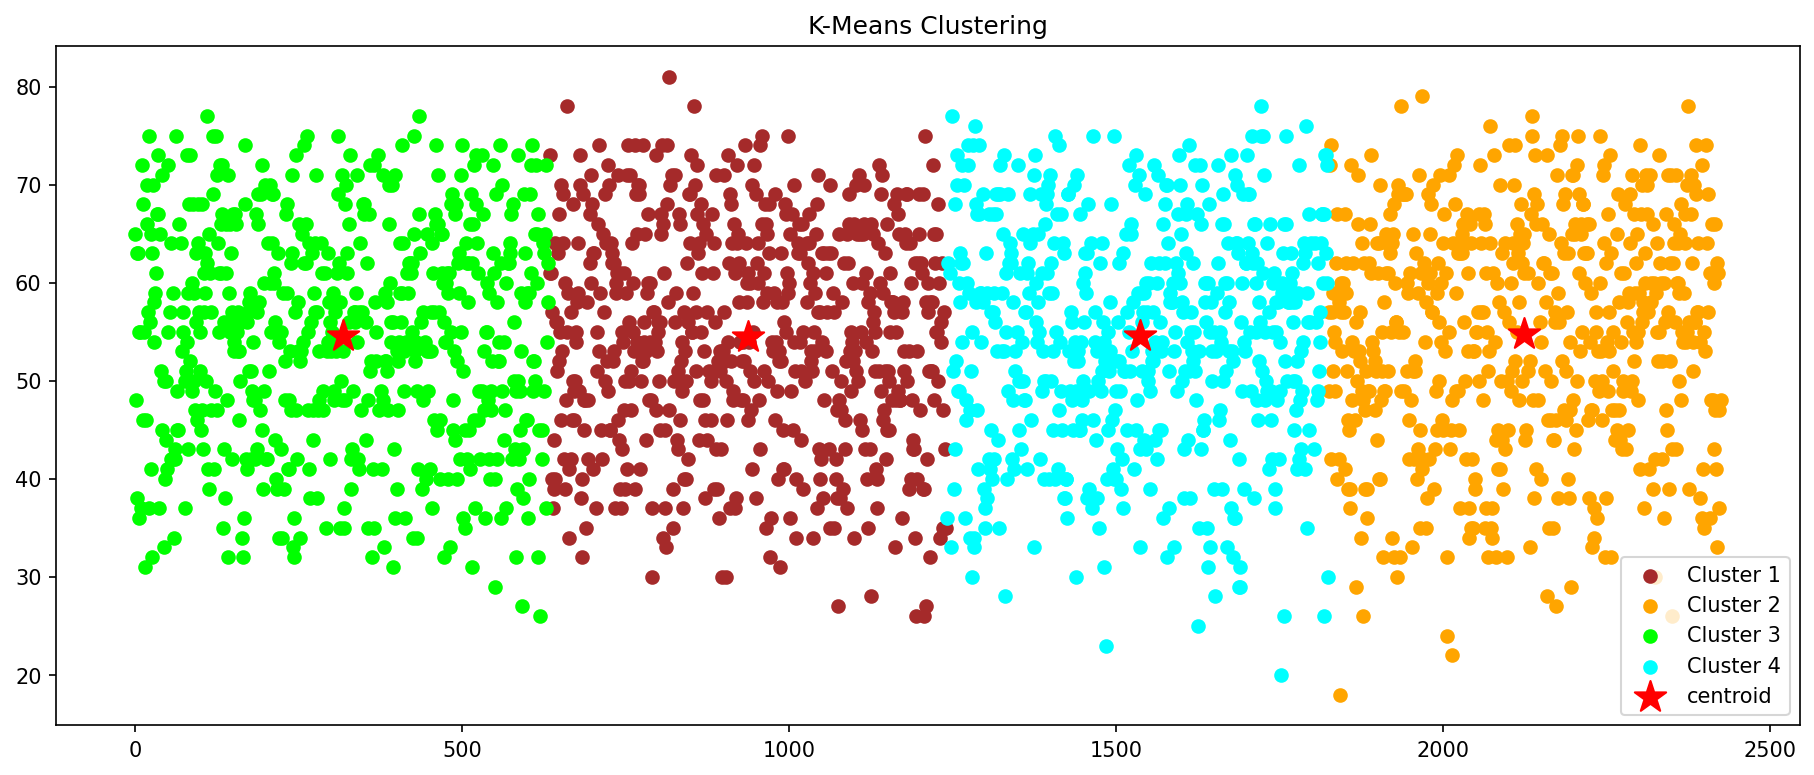

In [ ]:
plt.figure(figsize=(15,6), dpi = 150)

plt.scatter(x[y == 0, 0], x[y == 0, 1], color = 'brown', label = 'Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color = 'orange', label = 'Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], color = 'lime', label = 'Cluster 3')
plt.scatter(x[y == 3, 0], x[y == 3, 1], color = 'aqua', label = 'Cluster 4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],marker = '*', s = 250, c = 'red', label = 'centroid')


plt.title('K-Means Clustering')
plt.legend(loc = 'best')
plt.show();

In [ ]:
centroids  = km4.cluster_centers_

centroids_df = pd.DataFrame(centroids)
print ('\t'*5, ' The Table of Centroids')
centroids_df

					  The Table of Centroids


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,937.651943,54.413428,46.958057,43.855477,40.714028,0.014290,-0.767618,31.556537,27.192138,19.634276,0.026803,54.116254,33.144876,23.399647,0.068365,42.588339,28.962014,21.610071,0.047246,30.972792,27.031714,23.256537,0.016693,7.225114,5.470456,4.120355,0.006913,92.185512,81.266784,69.959364,0.047748,147.416961,129.720848,113.374558,0.071853,2.469014,2.339460,2.222166,0.000531,107.075972,...,144.252650,135.148479,0.038559,5.261484,4.015901,2.459364,0.006255,10.706714,9.768993,7.828622,0.006494,-668.466431,1.800353,285.508834,239.701413,209.148410,4.564470,4.174956,3.850972,0.001662,90.860424,76.834806,65.381625,0.053655,3.906360,3.610424,2.766784,0.002603,143.329682,140.156360,136.756184,0.014523,383061.524735,6.199647,4.913428,2.851590,0.007510,6.840919,5.725707,5.182862
1,2123.374771,54.725777,47.002541,43.961426,40.729817,0.013791,-0.711821,31.619744,26.861060,19.923218,0.026006,55.137112,33.130713,23.284278,0.075375,43.255941,28.907678,21.617733,0.051628,30.851188,27.017002,23.154479,0.017223,7.395871,5.564200,4.128097,0.007600,91.897623,81.094150,69.623400,0.048263,147.265082,129.755941,113.250457,0.072329,2.475048,2.352554,2.224177,0.000558,107.135832,...,144.837294,136.719642,0.037395,5.319927,4.082267,2.552102,0.006077,10.681901,9.540219,7.661792,0.006837,-690.361974,1.789762,284.332724,239.088665,208.729793,4.571536,4.193144,3.866325,0.001704,90.259598,76.758684,65.259598,0.052993,3.915905,3.585009,2.765996,0.002636,143.418647,140.185466,136.902011,0.015107,876010.936015,6.182815,4.842779,2.998172,0.007028,6.793473,5.699726,5.184278
2,318.458042,54.515734,47.137413,44.059703,40.828566,0.013577,-0.726548,31.694056,26.999126,19.631119,0.025818,54.323427,32.724650,22.669406,0.068769,44.403846,28.855769,21.288287,0.049684,31.028147,26.963462,23.181469,0.017076,7.442774,5.560253,4.179959,0.007164,92.477273,81.434441,70.312937,0.048229,147.529720,129.699301,113.909091,0.071332,2.483554,2.344927,2.226102,0.000546,107.166084,...,143.945804,134.899738,0.039013,5.340909,4.082168,2.491259,0.006096,10.709790,9.650350,7.585664,0.006698,-686.566434,1.790210,286.882867,239.304196,208.625874,4.751399,4.206766,3.861294,0.001985,91.136364,77.409091,65.814685,0.054567,3.895105,3.556818,2.758741,0.002459,143.501399,140.131906,136.716958,0.015252,124674.104895,6.159091,4.863636,2.945804,0.006893,6.837885,5.726136,5.184441
3,1535.895911,54.552045,46.941450,43.931691,40.792379,0.013442,-0.705447,31.907063,27.373606,20.347584,0.025489,54.180297,32.979554,22.703160,0.072260,42.208178,29.605019,21.665056,0.048233,30.725651,26.838476,23.059108,0.016470,7.348729,5.641446,4.216540,0.006856,91.527881,80.630112,69.641264,0.046342,146.288104,129.122677,113.159851,0.069135,2.471474,2.345637,2.218783,0.000529,107.234201,...,144.134758,135.107359,0.037950,5.317844,4.017658,2.472119,0.006224,10.879182,9.856413,8.048327,0.006343,-686.994424,1.823420,284.388476,236.946097,206.962825,4.622565,4.181784,3.850632,0.001613,90.276952,76.873606,65.013011,0.053078,3.923792,3.619888,2.877323,0.002352,143.466543,140.106877,136.644981,0.015124,635142.178439,6.276952,4.955390,3.033457,0.007109,6.807807,5.689405,5.181227


In [ ]:
pred = km4.predict(x)

df['cluster'] = pred
df['cluster'].value_counts() # Data distributed among four clusters

2    572
0    566
1    547
3    538
Name: cluster, dtype: int64

In [ ]:
df.shape

(2223, 102)

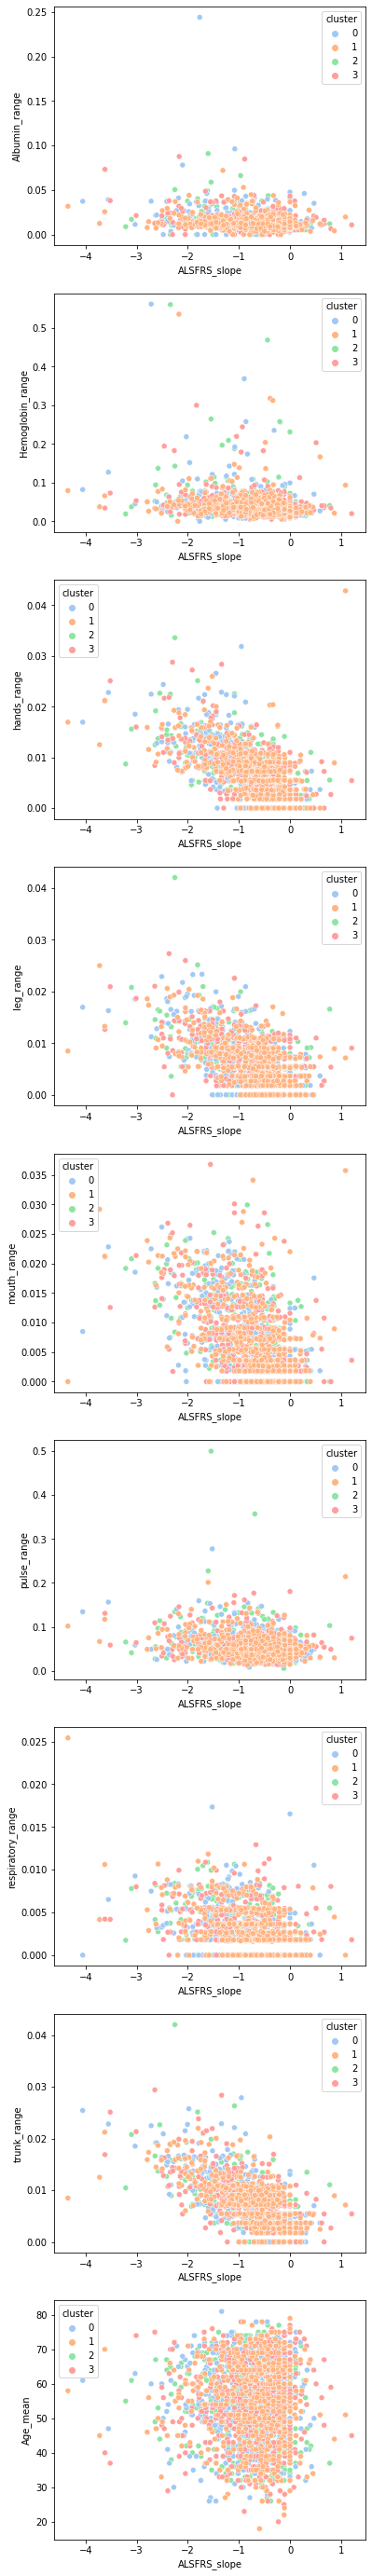

In [ ]:
# Select some of the most important variables for visualizing
Y = ['Albumin_range','Hemoglobin_range', 'hands_range',  'leg_range', 'mouth_range', 'pulse_range', 'respiratory_range', 'trunk_range', 'Age_mean']

# Plot 9 sub-scatter plots
fig, ax = plt.subplots(9,1,figsize=(6,50))
for i,y in enumerate(Y):
  sns.scatterplot ( 'ALSFRS_slope',y, hue = 'cluster', palette= 'pastel', data = df, ax=ax[i])

plt.show();

### **Clustring the data for  two features**

Columns: Age_mean, ALSFRS_slope




In [ ]:
df2 = pd.read_csv(r'/content/ALS_TrainingData_2223.csv')

In [ ]:
df_new=df2[["Age_mean","ALSFRS_slope"]]
df_new.head()

,Age_mean,ALSFRS_slope
0,65,-0.965608
1,48,-0.921717
2,38,-0.914787
3,63,-0.598361
4,63,-0.444039


In [ ]:
df_new=df2[["Age_mean","ALSFRS_slope"]]

In [ ]:
df_new

,Age_mean,ALSFRS_slope
0,65,-0.965608
1,48,-0.921717
2,38,-0.914787
3,63,-0.598361
4,63,-0.444039
...,...,...
2218,33,-0.239501
2219,61,-0.388711
2220,47,-0.108631
2221,37,-0.855880


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters = 3, random_state=101) #For two columns, i have selected three clusters

In [ ]:
x = df_new.iloc[:,:].values
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [ ]:
y=np.round(km.cluster_centers_)
y

array([[67., -1.],
       [54., -1.],
       [39., -1.]])

In [ ]:
df_new.shape

(2223, 2)

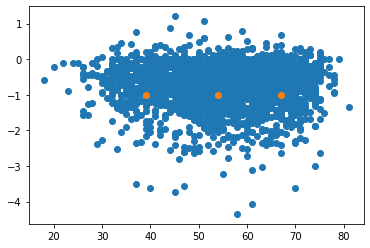

In [ ]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(y[:,0],y[:,1]) #Plotted the scatter plot for the three clusters with centroids 

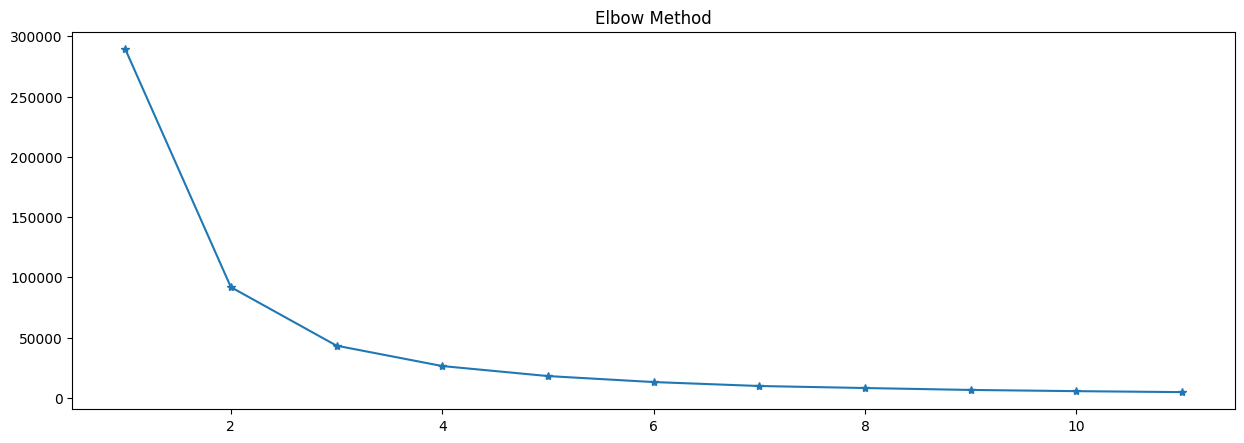

In [ ]:
wss = []

for i in range(1, 12):
    km = KMeans(n_clusters = i, random_state=101)
    km.fit(x)
    wss.append(km.inertia_)
    
plt.figure(figsize=(15,5), dpi = 100)
plt.plot(range(1, 12), wss,marker='*')
plt.title('Elbow Method')

plt.show();

In [ ]:
wss

[289456.7243258414,
 91926.97470561502,
 43369.994157598725,
 26480.61140760055,
 18174.968171747812,
 13200.588583044177,
 9927.909426971983,
 8251.173808324242,
 6667.408342720965,
 5659.961350012788,
 4859.368150876513]

In [ ]:
km = KMeans(n_clusters = 4, random_state=101)
km.fit(x)
y = km.fit_predict(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [ ]:
km_new.labels_ 

array([0, 1, 2, ..., 1, 2, 1], dtype=int32)

In [ ]:
km.cluster_centers_[:,0]
km.cluster_centers_[:,1]


array([59.45652174, 49.63694268, 37.42325581, 69.42315789])

array([-0.73486062, -0.75266061, -0.68295711, -0.72748868])

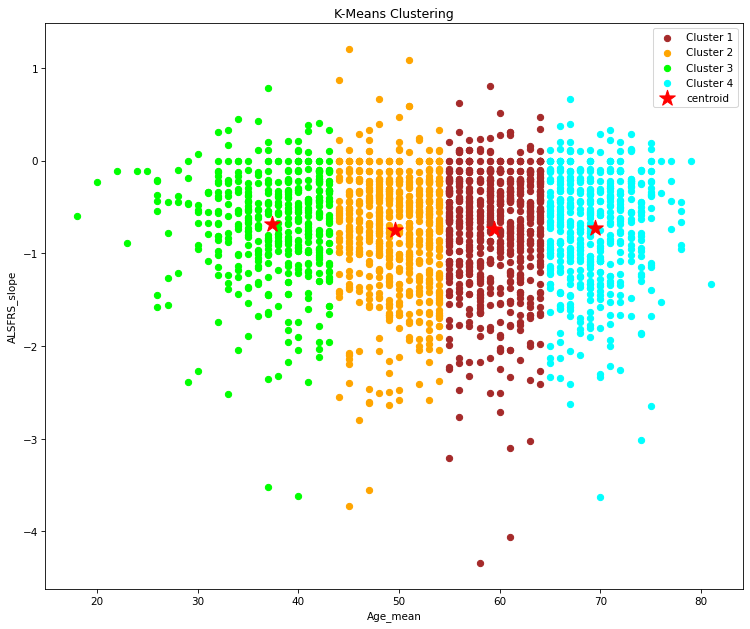

In [ ]:
plt.figure(figsize=(12,10), dpi = 75)

plt.scatter(x[y == 0, 0], x[y == 0, 1], color = 'brown', label = 'Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color = 'orange', label = 'Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], color = 'lime', label = 'Cluster 3')
plt.scatter(x[y == 3, 0], x[y == 3, 1], color = 'aqua', label = 'Cluster 4')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker = '*', s = 250, c = 'red', label = 'centroid')

plt.ylabel('ALSFRS_slope')
plt.xlabel('Age_mean')
plt.title('K-Means Clustering')
plt.legend(loc = 'best')
plt.show();

In [ ]:
The objective of clustering is to minimise the total intra-cluster variance, or the squared error function.

In general there is no method to determining the exact K value.

One of the metrics that is commonly used to compare the results across different values of K is the mean distance between data points and their cluster centroid.